In [1]:
import pandas as pd
import numpy as np
JPE = pd.read_excel('/Users/MattJohnson/Library/CloudStorage/OneDrive-UniversityofCapeTown/Masters_thesis/Data checks/Consolidation/Finalized/Merged_all.xlsx')
print(JPE.shape)

(18662, 41)


In [2]:
melted = JPE.melt(id_vars= ['Article_ID','year_master'], value_vars=["0_Auth_affs_0","0_Auth_affs_1","0_Auth_affs_2","0_Auth_affs_3", "0_Auth_affs_4",
                                                              "1_Auth_affs_0","1_Auth_affs_1","1_Auth_affs_2","1_Auth_affs_3", "1_Auth_affs_4",
                                                              "2_Auth_affs_0","2_Auth_affs_1","2_Auth_affs_2","2_Auth_affs_3", "2_Auth_affs_4",
                                                              "3_Auth_affs_0","3_Auth_affs_1","3_Auth_affs_2","3_Auth_affs_3", "3_Auth_affs_4",
                                                              "4_Auth_affs_0","4_Auth_affs_1","4_Auth_affs_2","4_Auth_affs_3", 
                                                              "5_Auth_affs_0","6_Auth_affs_0","7_Auth_affs_0"]).dropna()

melted.rename(columns = {'variable':'Aff Number'}, inplace = True)
melted.rename(columns = {'value':'Affiliation'}, inplace = True)
melted.rename(columns = {'year_master':'year'}, inplace = True)

melted = melted.sort_values(by=['year'])

print(melted.head())
print(melted.shape)

      Article_ID    year     Aff Number  \
0        2967475  1940.0  0_Auth_affs_0   
2614     1883332  1940.0  0_Auth_affs_0   
2613     1883333  1940.0  0_Auth_affs_0   
2612     1883334  1940.0  0_Auth_affs_0   
2611     1883335  1940.0  0_Auth_affs_0   

                                       Affiliation  
0     Cambridge Massachusetts United States (City)  
2614                              Brown University  
2613       Lexington Kentucky United States (City)  
2612       Lexington Kentucky United States (City)  
2611                     The University Of Buffalo  
(27975, 4)


In [6]:
melted['aff_cum_counts'] = melted.groupby(['Affiliation']).cumcount()+1

melted = melted[['Article_ID' ,'Aff Number', 'Affiliation','year', 'aff_cum_counts']]
melted.head()

mask_journal = melted['Affiliation'].isin(['National Bureau Of Economic Research'])
melted = melted[~mask_journal]

In [7]:
# Checking the top 20 occurances of Universities over the 70 years
highest_vals = melted.drop_duplicates(subset = ['Affiliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(21,'aff_cum_counts')
highest_vals_10



,Article_ID,Aff Number,Affiliation,year,aff_cum_counts
9295,657996,0_Auth_affs_0,Harvard University,2010.0,1449
195958,41038767,2_Auth_affs_0,University Of Chicago,2010.0,1137
102827,27804926,1_Auth_affs_0,Massachusetts Institute Of Technology,2010.0,966
121469,27805058,1_Auth_affs_1,Stanford University,2010.0,786
102831,27804930,1_Auth_affs_0,Princeton University,2010.0,717
102612,655844,1_Auth_affs_0,University Of Pennsylvania,2010.0,637
195962,41038771,2_Auth_affs_0,UCB,2010.0,612
195963,41038772,2_Auth_affs_0,Columbia University,2010.0,536
102844,27804943,1_Auth_affs_0,Yale University,2010.0,524
102607,658161,1_Auth_affs_0,Northwestern University,2010.0,523


(71, 5)
       Article_ID     Aff Number         Affiliation    year  aff_cum_counts
18620     1814492  0_Auth_affs_0  Harvard University  1940.0              13
18486         356  0_Auth_affs_0  Harvard University  1941.0              21
5603      1829333  0_Auth_affs_0  Harvard University  1942.0              27
2716      1882755  0_Auth_affs_0  Harvard University  1943.0              33
2749      1883321  0_Auth_affs_0  Harvard University  1944.0              38
        Article_ID     Aff Number         Affiliation    year  aff_cum_counts
10176     30034613  0_Auth_affs_0  Harvard University  2006.0            1266
103387    30034505  1_Auth_affs_0  Harvard University  2007.0            1300
98693     25098910  1_Auth_affs_0  Harvard University  2008.0            1354
196209    25592477  2_Auth_affs_0  Harvard University  2009.0            1394
9295        657996  0_Auth_affs_0  Harvard University  2010.0            1449
(71, 5)


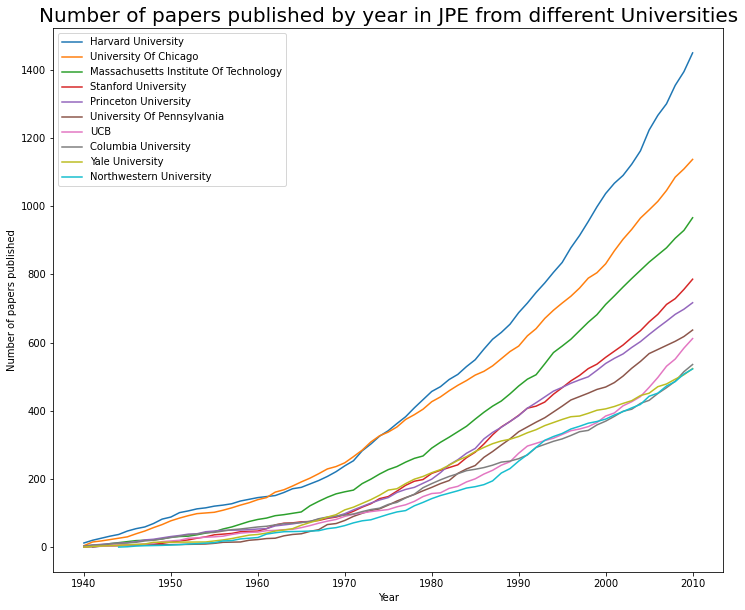

In [8]:
#Stacked plot on all years
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#print(melted.head())

a = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[0,2])].drop_duplicates(subset = ['year'], keep = 'last')
print(a.shape)
print(a.head())
print(a.tail())
b = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[1,2])].drop_duplicates(subset = ['year'], keep = 'last')
print(b.shape)
c = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[2,2])].drop_duplicates(subset = ['year'], keep = 'last')
d = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[3,2])].drop_duplicates(subset = ['year'], keep = 'last')
e = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[4,2])].drop_duplicates(subset = ['year'], keep = 'last')
f = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[5,2])].drop_duplicates(subset = ['year'], keep = 'last')
g = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[6,2])].drop_duplicates(subset = ['year'], keep = 'last')
h = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[7,2])].drop_duplicates(subset = ['year'], keep = 'last')
i = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[8,2])].drop_duplicates(subset = ['year'], keep = 'last')
j = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[9,2])].drop_duplicates(subset = ['year'], keep = 'last')
k = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[10,2])].drop_duplicates(subset = ['year'], keep = 'last')

plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,2])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,2])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,2])
plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,2])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,2])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,2])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,2])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,2])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,2])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,2])
#plt.plot(k['year'],k['aff_cum_counts'], label = highest_vals_10.iat[10,2])

plt.title('Number of papers published by year in JPE from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()